# Detection of Drowsiness for Drivers, using CNN.

* In this project we use OpenCV and TensorFlow

We develop a deep learning model to detect and determine whether a driver's eyes are open or closed classiying it into one of the two categories, using the **yawn-eye** dataset which consists of 617 images, split into training and test datasets. The dataset consists of subfolders of labelled data; closed, open, yawn , no_yawn.
We then train and test the developed deep learning model. 
To test the accuracy of predictions for this model in real time, we take images from 
a computer webcam using OpenCV and then fed to a deep learning model which then classifies the person's eyes as either open or closed, displaying a text on the screen and issuing a sound alert.

The steps followed in this project are:
1. Take image inputs from the dataset.
2. Determine a Region of Interest(ROI), for the detected face and eyes.
3. Feed this to a classifier(model), which classifies the eyes as either open or closed.
4. Keep track of how much time has elapsed with the person'e eyes open or closed, thus classifying the person as either drowsy or not.

## 1. Creating a model to identify whether the driver's eyes are open or closed.

### Loading the dataset

* The dataset contains four subfolders inside train and test folders. We will access the data and use it to train the model.    
* We will pre-process the images and then use them for model training.  
* Once the model is trained, we store the weights and model architecture in the file "result_model".


**Model architecture**

We use keras to build the model with the use of Convolutional Neural Networks(CNN).   
CNN is a deep neural network which is ideal for image classification.    
It consists of an input layer, output layer and hidden layers. The operation is performed using a filter that performs 2-dimension matrix multiplication on the layers.   

**The architecture we use in this project is:**
    
A CNN model made up of the following layers:

* Convolutional layer; 64 nodes, kernel size 3  
* Convolutional layer; 64 nodes, kernel size 3  
* Convolutional layer; 64 nodes, kernel size 3  
* Fully connected layer; 128 nodes   

The output layer is a fully connected 2-node layer. 
We use relu as the activation function for all layers except the output layer. where we use the Softmax activation function.

In [1]:
#!pip install pygame

In [2]:
#importing libraries
import cv2
import os
import random
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#CNN model
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense

#Saving the trained model
import pickle  #saving model to a pickle file

#Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the training dataset

#path to dataset
path = r'eye_dataset/train'
# categories of interest
GROUPS = ['Closed' , 'Open']

In [4]:
#Specifying image size
image_size = 24
data = []

#iterating through each image and expressing the image as an array
for group in GROUPS:
    folder = os.path.join(path,group)
    label = GROUPS.index(group)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
        img_arr = cv2.resize(img_arr,(image_size, image_size),1)
        data.append([img_arr , label])

In [5]:
#checking the length of the data
len(data)

1234

In [6]:
#randomly shuffling the data
random.shuffle(data)

In [7]:
#splitting the data into attributes and labels
X = []
Y = []

for attributes,labels in data:
    X.append(attributes)     #features
    Y.append(labels)     

In [8]:
#coverting X and Y into an arrays
X = np.array(X)
Y = np.array(Y)

## Saving the trained model in a Pickle file for future use.

* Machine learning models take a long time to train on large datasets.   
* Pickle is a Python tool that is useful for saving machine learning models so as to avoid having to retrain your model in order to re-use it.    
* This makes it reusable since the trained model can easily be re-loaded.   
* Pickle save and Pickle load functionality allow for saving and re-run of the saved pre-trained model.    

In [9]:
# save the data
pickle.dump(X , open('X.pkl' , 'wb'))
pickle.dump(Y , open('Y.pkl' , 'wb'))

In [10]:
#Normalizing the input image array - so that values lie between 0 and 1
X = X/255
X

array([[[0.45882353, 0.47058824, 0.45098039, ..., 0.70980392,
         0.75294118, 0.79215686],
        [0.4627451 , 0.47058824, 0.46666667, ..., 0.76078431,
         0.78823529, 0.84313725],
        [0.49411765, 0.51372549, 0.48627451, ..., 0.74509804,
         0.78823529, 0.85882353],
        ...,
        [0.59215686, 0.58431373, 0.57254902, ..., 0.64313725,
         0.6745098 , 0.69803922],
        [0.6       , 0.6       , 0.59215686, ..., 0.67843137,
         0.69803922, 0.71764706],
        [0.62745098, 0.61176471, 0.61960784, ..., 0.67843137,
         0.70196078, 0.72941176]],

       [[0.81568627, 0.81176471, 0.80784314, ..., 0.69019608,
         0.68235294, 0.65882353],
        [0.80784314, 0.81568627, 0.82352941, ..., 0.5254902 ,
         0.65882353, 0.63529412],
        [0.80392157, 0.8       , 0.81960784, ..., 0.6745098 ,
         0.61568627, 0.64705882],
        ...,
        [0.79607843, 0.76078431, 0.72941176, ..., 0.76862745,
         0.75294118, 0.7372549 ],
        [0.8

In [11]:
# reshaping the X array to (24,24,1)
image_rows,image_cols = 24,24
X = X.reshape(X.shape[0],image_rows,image_cols,1)
X.shape

(1234, 24, 24, 1)

## Exploring the data and visualizing a few images:

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1ea419237c0>)

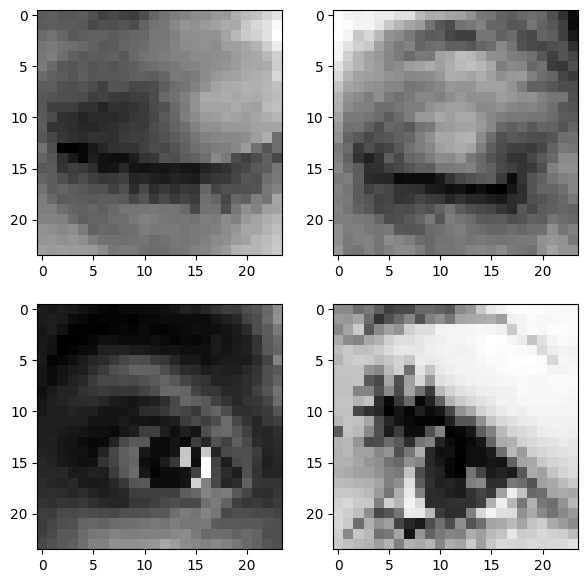

In [12]:
# visualizing images
i = 0
plt.figure(figsize=(7,7))
plt.subplot(221), plt.imshow(X[i], cmap='gray')
plt.subplot(222), plt.imshow(X[i+25], cmap='gray')
plt.subplot(223), plt.imshow(X[i+50], cmap='gray')
plt.subplot(224), plt.imshow(X[i+75], cmap='gray')

## Creating the Model - Using Keras

In [13]:
# creating the model
model = Sequential()

model.add(Conv2D(64 , (3,3) , activation = 'relu' , input_shape= X.shape[1:]))
model.add(MaxPooling2D((1,1)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((1,1)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((1,1)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

In [14]:
#Training (compiling) the created model
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [15]:
# fitting X , Y to the trained model
model.fit(X, Y, epochs = 5 , validation_split = 0.1 , batch_size = 32)

Epoch 1/5
35/35 [==============================] - 6s 138ms/step - loss: 0.4402 - accuracy: 0.8144 - val_loss: 0.3035 - val_accuracy: 0.8790
Epoch 2/5
35/35 [==============================] - 4s 126ms/step - loss: 0.2003 - accuracy: 0.9324 - val_loss: 0.1323 - val_accuracy: 0.9435
Epoch 3/5
35/35 [==============================] - 4s 126ms/step - loss: 0.1314 - accuracy: 0.9559 - val_loss: 0.1131 - val_accuracy: 0.9435
Epoch 4/5
35/35 [==============================] - 4s 124ms/step - loss: 0.0997 - accuracy: 0.9640 - val_loss: 0.0973 - val_accuracy: 0.9677
Epoch 5/5
35/35 [==============================] - 4s 129ms/step - loss: 0.1166 - accuracy: 0.9586 - val_loss: 0.0784 - val_accuracy: 0.9758


In [16]:
## saving the model to a pickle file
#model.save("result_model.h5")

## saving the model to a pickle file
#filename = 'result_model.h5'
# save data to a file
#with open(filename,'wb') as fout:
#    pickle.dump(model,fout)

In [17]:
# saving the model to a pickle file
model.save("result_model")


INFO:tensorflow:Assets written to: result_model\assets


INFO:tensorflow:Assets written to: result_model\assets


In [18]:
## load the model we created
#model = load_model("result_model.h5")

## Running the Model once again, recording the history, validation loss and accuracy amd measuring accuracy of chosen model

In [19]:
from keras.callbacks import ModelCheckpoint

#Training and saving model with the best validation accuracy
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

# fitting X , Y to the trained model
#model.fit(X, Y, epochs = 5 , validation_split = 0.1 , batch_size = 32)
history = model.fit(X, Y,epochs=20, callbacks=[checkpoint], validation_split=0.1, batch_size = 32)

Epoch 1/20
35/35 [==============================] - ETA: 0s - loss: 0.0707 - accuracy: 0.9721

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


35/35 [==============================] - 8s 229ms/step - loss: 0.0707 - accuracy: 0.9721 - val_loss: 0.0582 - val_accuracy: 0.9597
Epoch 2/20
35/35 [==============================] - 5s 143ms/step - loss: 0.0612 - accuracy: 0.9748 - val_loss: 0.0789 - val_accuracy: 0.9677
Epoch 3/20
35/35 [==============================] - 4s 125ms/step - loss: 0.0395 - accuracy: 0.9811 - val_loss: 0.0630 - val_accuracy: 0.9677
Epoch 4/20
35/35 [==============================] - ETA: 0s - loss: 0.0298 - accuracy: 0.9883

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


35/35 [==============================] - 7s 201ms/step - loss: 0.0298 - accuracy: 0.9883 - val_loss: 0.0447 - val_accuracy: 0.9758
Epoch 5/20
35/35 [==============================] - 5s 130ms/step - loss: 0.0402 - accuracy: 0.9883 - val_loss: 0.0906 - val_accuracy: 0.9758
Epoch 6/20
35/35 [==============================] - 4s 124ms/step - loss: 0.0547 - accuracy: 0.9757 - val_loss: 0.0478 - val_accuracy: 0.9839
Epoch 7/20
35/35 [==============================] - 5s 129ms/step - loss: 0.0286 - accuracy: 0.9883 - val_loss: 0.0646 - val_accuracy: 0.9758
Epoch 8/20
35/35 [==============================] - 4s 124ms/step - loss: 0.0151 - accuracy: 0.9946 - val_loss: 0.0721 - val_accuracy: 0.9839
Epoch 9/20
35/35 [==============================] - 4s 127ms/step - loss: 0.0120 - accuracy: 0.9964 - val_loss: 0.0582 - val_accuracy: 0.9839
Epoch 10/20
35/35 [==============================] - 5s 131ms/step - loss: 0.0202 - accuracy: 0.9928 - val_loss: 0.0580 - val_accuracy: 0.9919
Epoch 11/20
35/3

INFO:tensorflow:Assets written to: model-012.model\assets


INFO:tensorflow:Assets written to: model-012.model\assets


35/35 [==============================] - 8s 217ms/step - loss: 0.0111 - accuracy: 0.9955 - val_loss: 0.0392 - val_accuracy: 0.9919
Epoch 13/20
35/35 [==============================] - 5s 134ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0416 - val_accuracy: 0.9839
Epoch 14/20
35/35 [==============================] - 4s 122ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0797 - val_accuracy: 0.9839
Epoch 15/20
35/35 [==============================] - 5s 135ms/step - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.0497 - val_accuracy: 0.9839
Epoch 16/20
35/35 [==============================] - 4s 124ms/step - loss: 8.2994e-04 - accuracy: 1.0000 - val_loss: 0.0538 - val_accuracy: 0.9758
Epoch 17/20
35/35 [==============================] - 5s 150ms/step - loss: 5.0062e-04 - accuracy: 1.0000 - val_loss: 0.0496 - val_accuracy: 0.9839
Epoch 18/20
35/35 [==============================] - 5s 139ms/step - loss: 2.8315e-04 - accuracy: 1.0000 - val_loss: 0.0579 - val_accuracy: 0.9758

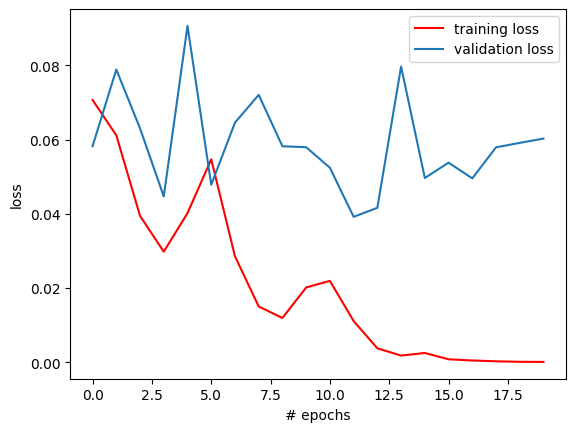

In [20]:
# Plotting train and validation loss per epoch

from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

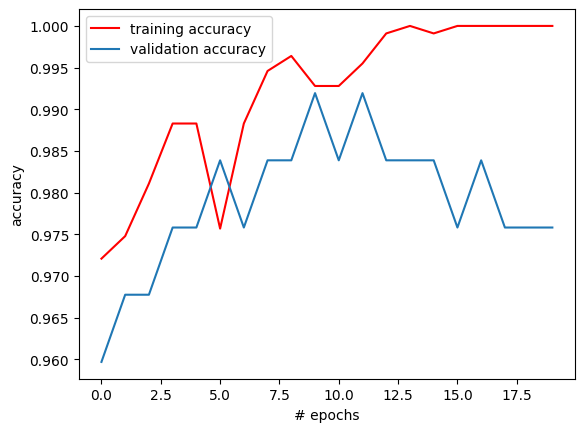

In [21]:
# Plotting train and validation accuracy per epoch

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [22]:
#print(model.evaluate(test_data,test_target))
print(model.evaluate(X,Y))
# Model loss and accuracy

39/39 [==============================] - 1s 28ms/step - loss: 0.0061 - accuracy: 0.9976
[0.006147994659841061, 0.9975689053535461]



Dataset: https://www.kaggle.com/datasets/serenaraju/yawn-eye-dataset-new
Pickle: https://practicaldatascience.co.uk/machine-learning/how-to-save-and-load-machine-learning-models-using-pickle
https://docs.python.org/3/library/pickle.html